In [3]:
from typing import Any
import matplotlib as mpl
from dataclasses import dataclass
import numpy as np

PRIMARIES_CMAP = mpl.colormaps["turbo"].reversed()


@dataclass(frozen=True)
class CustomPrimary:
    name: str
    A: float
    Z: int

    def Z_extreme(self) -> tuple[int, int]:
        return (self.Z, self.Z)

    def __str__(self) -> str:
        return self.name

    def atomic_mass_number(self) -> float:
        return self.A

    def color(self) -> Any:
        return PRIMARIES_CMAP(np.log(self.A) / LN_A_MAX)


ALL_PRIMARIES = [
    CustomPrimary(name="H", A=1, Z=1),
    CustomPrimary(name="He", A=4, Z=2),
    CustomPrimary(name="Li", A=7, Z=3),
    CustomPrimary(name="Be", A=9, Z=4),
    CustomPrimary(name="B", A=11, Z=5),
    CustomPrimary(name="C", A=12, Z=6),
    CustomPrimary(name="N", A=14, Z=7),
    CustomPrimary(name="O", A=16, Z=8),
    CustomPrimary(name="F", A=19, Z=9),
    CustomPrimary(name="Ne", A=20, Z=10),
    CustomPrimary(name="Na", A=23, Z=11),
    CustomPrimary(name="Mg", A=24, Z=12),
    CustomPrimary(name="Al", A=27, Z=13),
    CustomPrimary(name="Si", A=28, Z=14),
    CustomPrimary(name="P", A=31, Z=15),
    CustomPrimary(name="S", A=32, Z=16),
    CustomPrimary(name="Cl", A=35, Z=17),
    CustomPrimary(name="Ar", A=40, Z=18),
    CustomPrimary(name="K", A=39, Z=19),
    CustomPrimary(name="Ca", A=40, Z=20),
    CustomPrimary(name="Sc", A=45, Z=21),
    CustomPrimary(name="Ti", A=48, Z=22),
    CustomPrimary(name="V", A=51, Z=23),
    CustomPrimary(name="Cr", A=52, Z=24),
    CustomPrimary(name="Mn", A=55, Z=25),
    CustomPrimary(name="Fe", A=56, Z=26),
]
LN_A_MAX = np.log(ALL_PRIMARIES[-1].A)

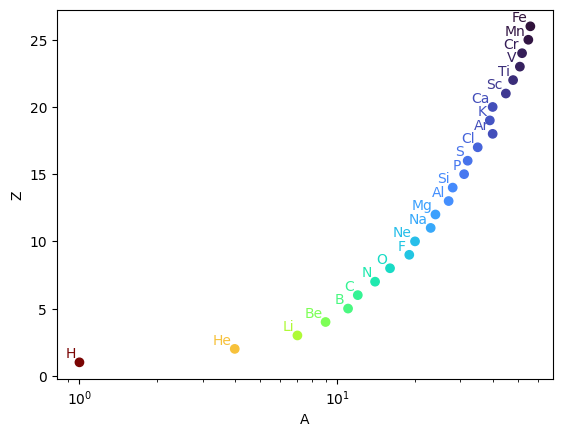

In [26]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots()

ax.scatter(
    [p.A for p in ALL_PRIMARIES],
    [p.Z for p in ALL_PRIMARIES],
    c=[p.color() for p in ALL_PRIMARIES]
)
for p in ALL_PRIMARIES:
    ax.text(p.A / 1.03, p.Z + 0.35, p.name, color=p.color(), horizontalalignment="right")
ax.set_xscale("log")
ax.set_xlabel("A")
ax.set_ylabel("Z")
fig.savefig("primaries.pdf")